# KMeans Clustering

## Clustering su dataset generati artificialmente

In [1]:
#Crea dei datasets sintetici generati artificialmente, campionando a gruppi da una distribuzione pseudo-normale
from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, centers=4, random_state=random_state)

In [2]:
from KMeans import KMeans

kmeans = KMeans(n_clusters=4, max_iter=500, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

Text(0.5, 1.0, 'k-means clusters=4')

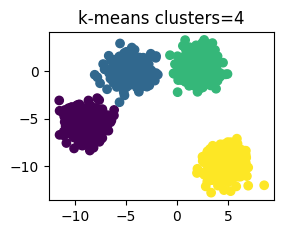

In [3]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("k-means clusters=4")

In [4]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcola i valori della silhouette per ciascun punto
silhouette_vals = silhouette_samples(X, y_pred)

# Calcola il Silhouette Score medio
silhouette_avg = silhouette_score(X, y_pred)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.759335349300705


## Clustering su dataset reali

In [5]:
import pandas as pd

path = '../datasets/heart_failure_clinical_records_dataset.csv'
dataset = pd.read_csv(path)

### Feature description

Thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase  (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction  (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

In [6]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
#gives information about the data types,columns, null value counts, memory usage etc
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


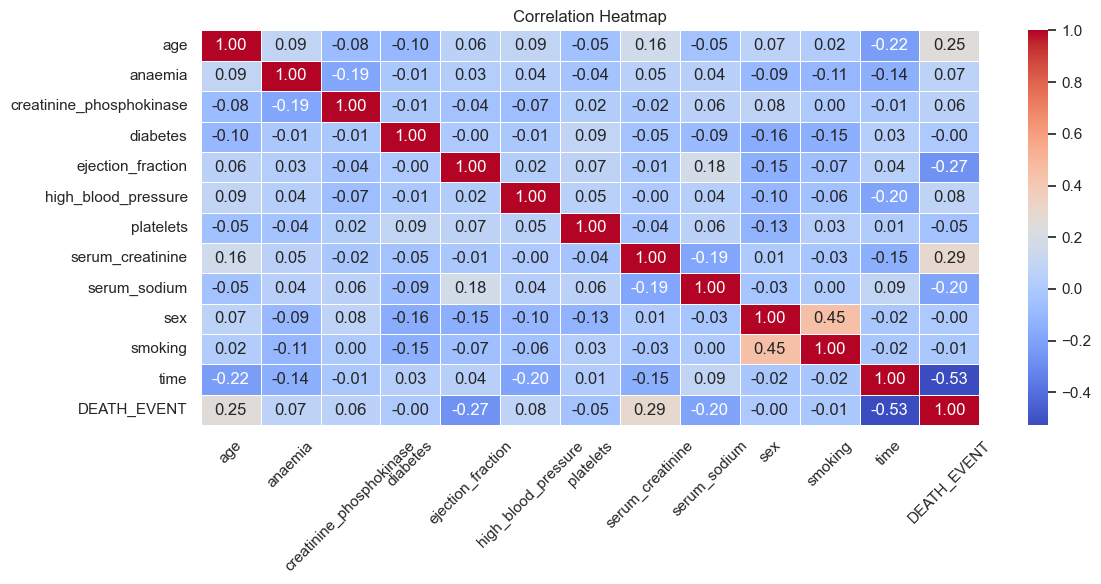

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
sns.set_color_codes('colorblind')

Corr = dataset.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(Corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

## Correlation between serum creatinine and death event

In [9]:
features = ['serum_creatinine', 'age']  # Usa i nomi delle colonne corretti dal tuo dataset
X = dataset[features].values
y = dataset['DEATH_EVENT'].values


In [10]:
from sklearn.preprocessing import MinMaxScaler

# Standardizzare le caratteristiche
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
from KMeans import KMeans

kmeans = KMeans(n_clusters=2, max_iter=500, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

In [12]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcola i valori della silhouette per ciascun punto
silhouette_vals = silhouette_samples(X, y_kmeans)

# Calcola il Silhouette Score medio
silhouette_avg = silhouette_score(X, y_kmeans)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5493176278245883


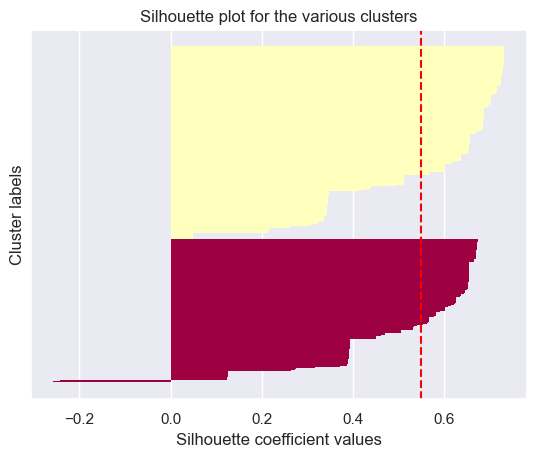

In [13]:
import matplotlib.pyplot as plt

# Plot
n_clusters = 2
fig, ax1 = plt.subplots()
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    ith_cluster_silhouette_vals = silhouette_vals[y_kmeans == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper += size_cluster_i
    color = plt.cm.Spectral(float(i) / n_clusters)
    ax1.barh(range(y_lower, y_upper), ith_cluster_silhouette_vals, height=1.0, edgecolor='none', color=color)
    y_lower += size_cluster_i

# Calcola la silhouette media
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.yticks([])
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster labels')
plt.title('Silhouette plot for the various clusters')
plt.show()

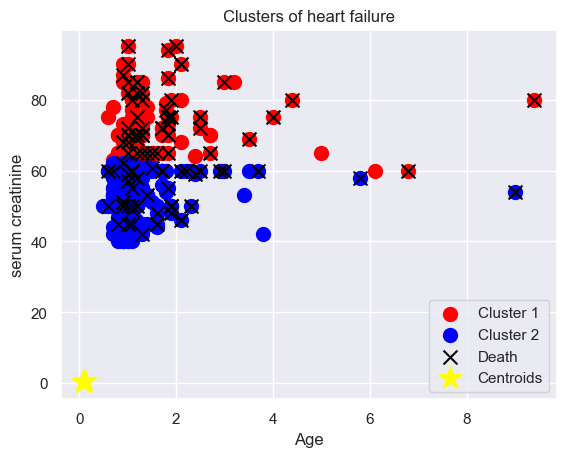

In [14]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(X[y == 1, 0], X[y == 1, 1], s=100, c='black', marker='x', label='Death')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s = 300, c = 'yellow', marker='*', label = 'Centroids')
plt.title('Clusters of heart failure')
plt.xlabel('Age')
plt.ylabel('serum creatinine')
plt.legend()
plt.show()

## Correlation between ejection fraction and age in death event

In [15]:
#import numpy as np
#
## Data preprocessing for category family
#target = dataset['DEATH_EVENT']
#y = np.asarray(target)
#X = dataset.iloc[:, [0, 6]].values

In [16]:
features = ['ejection_fraction', 'time']  # Usa i nomi delle colonne corretti dal tuo dataset
X = dataset[features].values
y = dataset['DEATH_EVENT'].values

In [17]:
from sklearn.preprocessing import StandardScaler

# Standardizzare le caratteristiche
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
from KMeans import KMeans

kmeans = KMeans(n_clusters=2, max_iter=500, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)


In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcola i valori della silhouette per ciascun punto
silhouette_vals = silhouette_samples(X, y_kmeans)

# Calcola il Silhouette Score medio
silhouette_avg = silhouette_score(X, y_kmeans)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6440442171665604


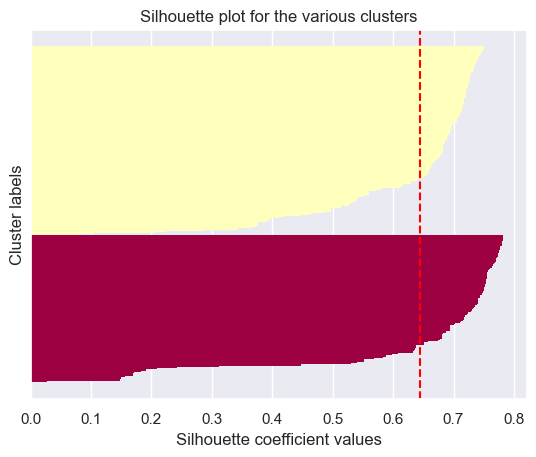

In [20]:
import matplotlib.pyplot as plt

# Plot
n_clusters = 2
fig, ax1 = plt.subplots()
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    ith_cluster_silhouette_vals = silhouette_vals[y_kmeans == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper += size_cluster_i
    color = plt.cm.Spectral(float(i) / n_clusters)
    ax1.barh(range(y_lower, y_upper), ith_cluster_silhouette_vals, height=1.0, edgecolor='none', color=color)
    y_lower += size_cluster_i

# Calcola la silhouette media
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.yticks([])
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster labels')
plt.title('Silhouette plot for the various clusters')
plt.show()

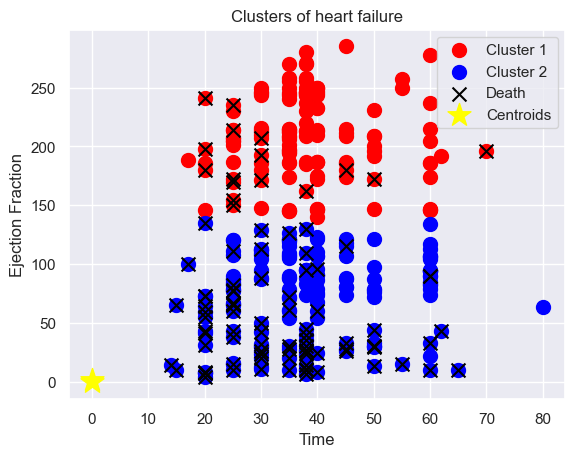

In [21]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(X[y == 1, 0], X[y == 1, 1], s=100, c='black', marker='x', label='Death')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s = 300, c = 'yellow', marker='*', label = 'Centroids')
plt.title('Clusters of heart failure')
plt.xlabel('Time')
plt.ylabel('Ejection Fraction')
plt.legend()
plt.show()

In [22]:
import numpy as np

# Data preprocessing for category family
target = dataset['DEATH_EVENT']
y = np.asarray(target)
X = dataset.drop(columns=['DEATH_EVENT'])
X = np.asarray(X)

print(X)

[[7.500e+01 0.000e+00 5.820e+02 ... 1.000e+00 0.000e+00 4.000e+00]
 [5.500e+01 0.000e+00 7.861e+03 ... 1.000e+00 0.000e+00 6.000e+00]
 [6.500e+01 0.000e+00 1.460e+02 ... 1.000e+00 1.000e+00 7.000e+00]
 ...
 [4.500e+01 0.000e+00 2.060e+03 ... 0.000e+00 0.000e+00 2.780e+02]
 [4.500e+01 0.000e+00 2.413e+03 ... 1.000e+00 1.000e+00 2.800e+02]
 [5.000e+01 0.000e+00 1.960e+02 ... 1.000e+00 1.000e+00 2.850e+02]]


In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
from KMeans import KMeans

kmeans = KMeans(n_clusters=3, max_iter=500, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Aggiungi i cluster al dataframe originale
dataset['Cluster'] = y_kmeans

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcola i valori della silhouette per ciascun punto
silhouette_vals = silhouette_samples(X, y_kmeans)

# Calcola il Silhouette Score medio
silhouette_avg = silhouette_score(X, y_kmeans)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5481474536588523


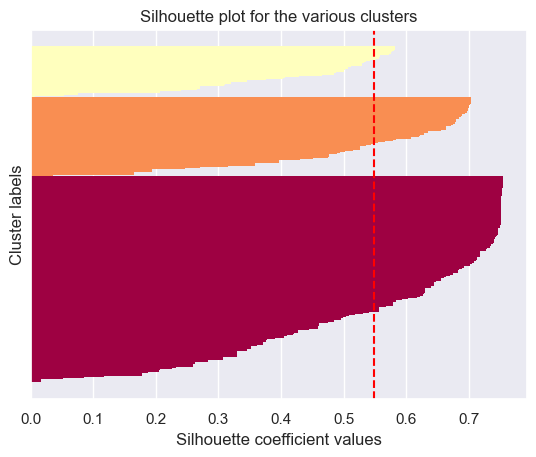

In [26]:
import matplotlib.pyplot as plt

# Plot
n_clusters = 4
fig, ax1 = plt.subplots()
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    ith_cluster_silhouette_vals = silhouette_vals[y_kmeans == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper += size_cluster_i
    color = plt.cm.Spectral(float(i) / n_clusters)
    ax1.barh(range(y_lower, y_upper), ith_cluster_silhouette_vals, height=1.0, edgecolor='none', color=color)
    y_lower += size_cluster_i

# Calcola la silhouette media
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.yticks([])
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster labels')
plt.title('Silhouette plot for the various clusters')
plt.show()

## Comparison with Scikit-learn API

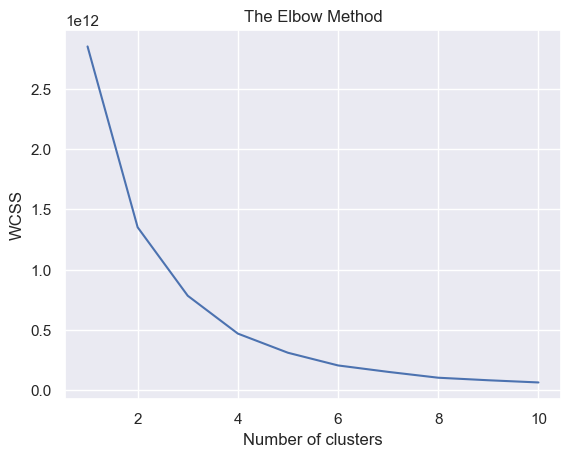

In [27]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=50, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=10)
# Esegui KMeans sui dati
kmeans.fit(X)

# Ottieni le etichette dei cluster assegnate a ciascun punto
y_kmeans = kmeans.predict(X)

In [29]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcola i valori della silhouette per ciascun punto
silhouette_vals = silhouette_samples(X, y_kmeans)

# Calcola il Silhouette Score medio
silhouette_avg = silhouette_score(X, y_kmeans)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5532013484910796


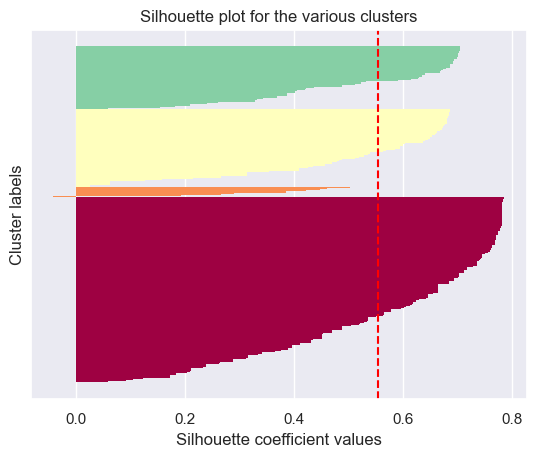

In [30]:
import matplotlib.pyplot as plt

# Plot
n_clusters = 4
fig, ax1 = plt.subplots()
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    ith_cluster_silhouette_vals = silhouette_vals[y_kmeans == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper += size_cluster_i
    color = plt.cm.Spectral(float(i) / n_clusters)
    ax1.barh(range(y_lower, y_upper), ith_cluster_silhouette_vals, height=1.0, edgecolor='none', color=color)
    y_lower += size_cluster_i

# Calcola la silhouette media
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.yticks([])
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster labels')
plt.title('Silhouette plot for the various clusters')
plt.show()

## Comparison with Weka tool

![](knn_weka.png)

![](clustering_weka.png)